## 37. Оценка внутреннего коэффициента воспроизводства. Решение нелинейного уравнения

[Birch L.C. The intrinsic rate of natural increase of an insect population. The Journal of Animal Ecology (1948): 15-26]

В статье приводятся данные и анализируются данные о вероятностях дожития и фертильности особей рисового жука долгоносика (Calandra oryzae), выращиваемых в оптимальных условиях (29 градусов C, пшеница, 14% влажность)

Ниже в таблице для возраста $t$ (в неделях) особи женского пола указаны:
* $l_t$ – вероятность дожития до этого возраста;
* $m_t$ – среднее число потомков женского пола, рожденных одной особью в этом возрасте.

```
  t   l_t  m_t  
----------------  
  4.5 0.87 20.0
  5.5 0.83 23.0
  6.5 0.81 15.0
  7.5 0.80 12.5
  8.5 0.79 12.5
  9.5 0.77 14.0
 10.5 0.74 12.5
 11.5 0.66 14.5
 12.5 0.59 11.0
 13.5 0.52  9.5
 14.5 0.45  2.5
 15.5 0.36  2.5
 16.5 0.29  2.5
 17.5 0.25  4.0
 18.5 0.19  1.0
```

По данным найдите *чистый коэффициент воспроизводства* (net reproduction rate)
$$
R_0 = \sum_{t} l_t m_t
$$
Этот коэффициент равен среднему количеству особей, которых рождает самка за всю жизнь (или, что то же самое, множитель, на который умножается численность популяции за одно поколение), если популяция живет в идеальных условиях на неограниченной территории. 

Коэффициент $R_0$ следует отличать от *внутреннего коэффициента естественной репродукции* (Intrinsic Rate of Natural Increase) $r$ – множитель на каждую особь, на который умножается численность популяции, живущей в определенных условиях на неограниченной территории.
$$
N' = r N,
\qquad
N = N_0 e^{rt}
$$

Коэффициент $r$ равен $r = b - d$ (birth-rate - death-rate)

$r$ можно определить по $R_0$ путем решения уравнения 
$$
\sum_t e^{-rt} l_t m_t = 1.
$$

Построить график функции в левой части уравнения. Подобрать показательный диапазон для $r$.

Численно решить данное нелинейное уравнение, используя `scipy.optimize.brentq`.

(Ответ: 0.7620)



In [89]:
# Подключение библиотек

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
from math import e

In [90]:
# Внесение данных

t = [4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]
l_t = [0.87, 0.83, 0.81, 0.80, 0.79, 0.77, 0.74, 0.66, 0.59, 0.52, 0.45, 0.36, 0.29, 0.25, 0.19]
m_t = [20.0, 23.0, 15.0, 12.5, 12.5, 14.0, 12.5, 14.5, 11.0, 9.5, 2.5, 2.5, 2.5, 4.0, 1.0]

Найдем *чистый коэффициент воспроизводства* по формуле:
$$
R_0 = \sum_{t} l_t m_t
$$

In [91]:
reproduction_rate = 0

for i in range(len(t)):
    reproduction_rate += l_t[i] * m_t[i]

print(reproduction_rate)

113.48499999999997


Определим функцию *f* для нахождения *внутреннего коэффициента естественной репродукции* *r* по формуле:
$$
\sum_t e^{-rt} l_t m_t = 1.
$$

In [92]:
def f(x):
    s = 0
    for i in range(len(t)):
        s += e ** (-x * t[i]) * l_t[i] * m_t[i]
    return s - 1 

Найдем *r* с помощью Метода Брента

In [93]:
r = brentq(f, -5, 5)
print(r)

0.7619840766980146


Построим график функции *f* в левой части уравнения

In [94]:
# Определение функции f_left для нахождения левой части f

def f_left(x):
    s = 0
    for i in range(len(t)):
        s += e ** (-x * t[i]) * l_t[i] * m_t[i]
    return s 

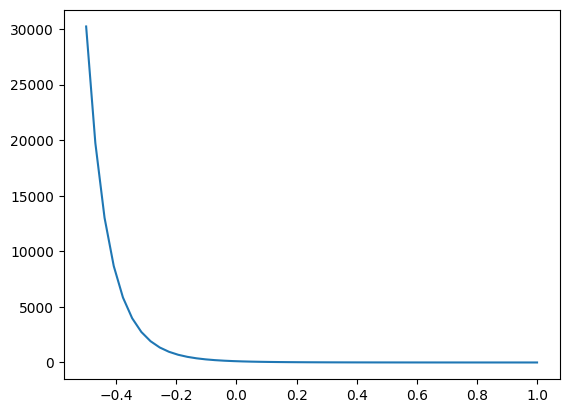

In [95]:
x = np.linspace(-0.5, 1)
y = f_left(x)
plt.plot(x, y)